5<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [176]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [177]:
# df.info()
df_new = df[['Freedom', 'Positive affect']]
df_new = df_new.dropna()
df_new.head()

,Freedom,Positive affect
0,5.0,41.0
1,6.0,24.0
2,3.0,16.0
3,7.0,3.0
4,19.0,12.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

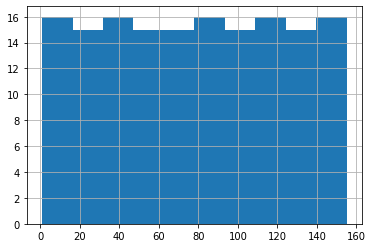

In [173]:
#Равномерное
freedom = df_new['Freedom']
plt.hist(freedom)
plt.grid(True)


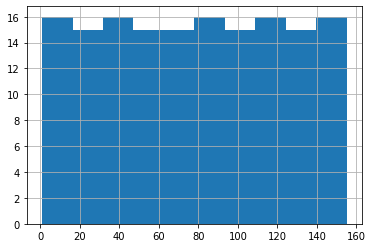

In [151]:
#Равномерное
plt.hist(df['Positive affect'])
plt.grid(True)

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [152]:
statistics.median(freedom)

78.0

In [153]:
min(freedom)

1.0

In [154]:
max(freedom)

155.0

In [155]:
f_range = max(freedom) - min(freedom)
f_range

154.0

In [156]:
freedom.dropna()
statistics.pvariance(freedom)

2002.0

In [161]:
statistics.mode(df['Freedom'])

Почему нельзя найти моду?

In [0]:
все значения уникальны, никакое не встречается чаще других

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

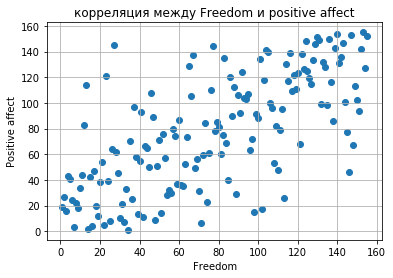

In [36]:
plt.title('корреляция между Freedom и positive affect')
plt.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.scatter(df['Freedom'], df['Positive affect'])

In [164]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
corr
#Есть прямая корреляция

0.6817698430601656

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [171]:
#центрирование
statistics.mean(freedom)
freedom_1 = freedom - statistics.mean(freedom)
# freedom_1
statistics.mean(freedom_1)

0.0

Построить матрицу корреляций для всех колонок таблицы

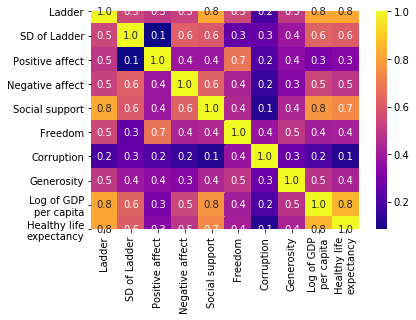

In [185]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, fmt=".1f",  cmap='plasma')

Загрузить таблицу цен на авокадо: 

In [188]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
avocado =pd.read_csv(url)
avocado[:6]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

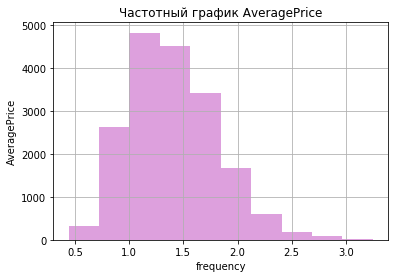

In [190]:
# распределение визуально нормальное, но смещенное и левый край очень резкий, похоже на логнормальное
plt.hist(avocado['AveragePrice'], 10, facecolor='plum')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice')
plt.grid(True)

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

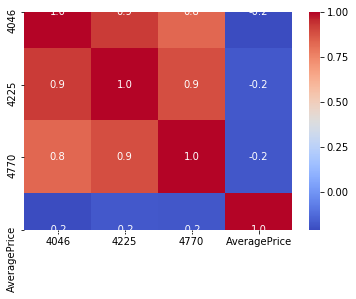

In [192]:
avocado = avocado[['4046', '4225', '4770', 'AveragePrice']]
import seaborn as sns
sns.heatmap(avocado.corr(), annot=True, fmt=".1f",  cmap='coolwarm')

#Есть прямая корреляция между ценой на разные plu, видимо это разные сорта. 
# Растут продажи одних, растут продажи других, наверное сезонный спрос.
# А с ценой корреляция обратная, видимо цены снижаются
